Automatically created module for IPython interactive environment


[]

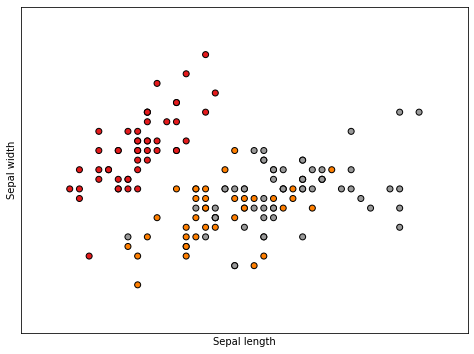

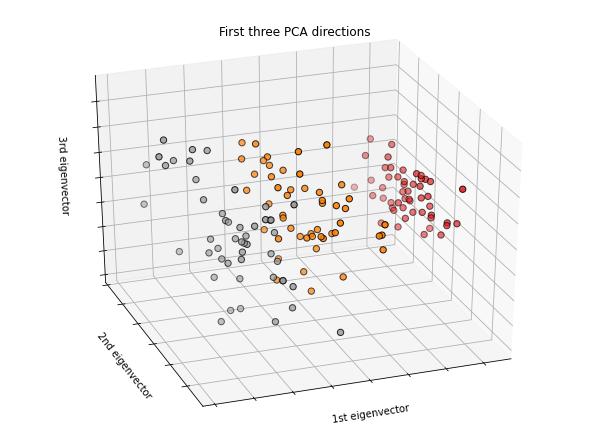

In [4]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
#print(iris)
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

#plt.show()

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()
#print([X,y] )
# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
#data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    # columns= iris['feature_names'] + ['target'])

#datainput = data1[['sepal length (cm)', 'sepal width (cm)','target']]

data1= pd.DataFrame(data=np.c_[X_test,y_test] ,
                     columns= ['feat_A','feat_B','target'])
datainput = data1[['feat_A','feat_B','target']]
print(data1.columns)
class0 = datainput.loc[datainput['target']==0]
class1 = datainput.loc[datainput['target']==1]
#class2 = datainput.loc[datainput['target']== 2]
print (class1.head())
print (class0.head())
#points0 =class0[['sepal length (cm)', 'sepal width (cm)']].to_numpy()
#points1=class1[['sepal length (cm)', 'sepal width (cm)']].to_numpy()

points0 = class0[['feat_A','feat_B']].to_numpy()
points1=class1[['feat_A','feat_B']].to_numpy()
#print(points0)
#print(points1)

Index(['feat_A', 'feat_B', 'target'], dtype='object')
     feat_A    feat_B  target
0  1.421252  0.620137     1.0
3  0.308752 -1.728789     1.0
4  2.088742 -1.116317     1.0
5  1.588186 -1.351516     1.0
7  1.493085 -0.841691     1.0
      feat_A    feat_B  target
1  -1.418082  0.277501     0.0
2  -0.582909  0.318028     0.0
6  -0.953502 -0.098256     0.0
8  -1.115600 -0.079304     0.0
10 -0.120075  1.722838     0.0


In [6]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
stretchCoef = 1.2
#points = np.random.rand(30, 2)   # 30 random points in 2-D
#points2 = np.random.rand(20, 2)   # 30 random points in 2-D
hull = ConvexHull(points0[:, [0, 1]])
hull1 = ConvexHull(points1[:, [0, 1]])
#print(hull.simplices*2)

-0.8243768007890437 0.05578393266264455


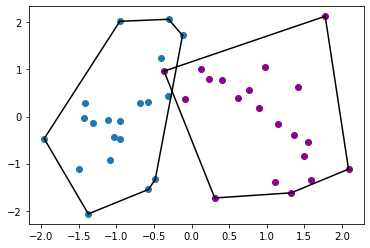

In [7]:
import matplotlib.pyplot as plt
plt.scatter(points0[:,0], points0[:,1])
plt.scatter(points1[:,0], points1[:,1], c='darkmagenta')

for simplex in hull.simplices:
    plt.plot(points0[simplex, 0], points0[simplex, 1], 'k-')
for simplex in hull1.simplices:
    plt.plot(points1[simplex, 0], points1[simplex, 1], 'k-')
cx = np.mean(hull.points[hull.vertices,0])
cy = np.mean(hull.points[hull.vertices,1])
cx1 = np.mean(hull1.points[hull.vertices,0])
cy1 = np.mean(hull1.points[hull.vertices,1])
print(cx,cy)

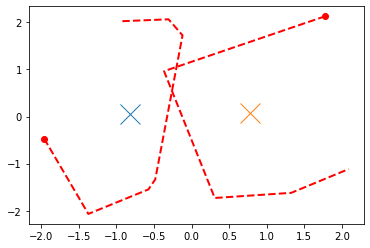

In [8]:
plt.plot(points0[hull.vertices,0], points0[hull.vertices,1], 'r--', lw=2)
plt.plot(points0[hull.vertices[0],0], points0[hull.vertices[0],1], 'ro')

plt.plot(points1[hull1.vertices,0], points1[hull1.vertices,1], 'r--', lw=2)
plt.plot(points1[hull1.vertices[0],0], points1[hull1.vertices[0],1], 'ro')

plt.plot(cx, cy,'x',ms=20)
plt.plot(cx1, cy1,'x',ms=20)
plt.show()


Scaling the convex hull

[[-1.37330233 -2.06723849]
 [-1.96100009 -0.46948227]]
[[-0.95379068  2.02222448]
 [-1.96100009 -0.46948227]]
[[-0.48321512 -1.33513763]
 [-0.1200747   1.72283798]]
[[-0.30561318  2.06418871]
 [-0.1200747   1.72283798]]
[[-0.30561318  2.06418871]
 [-0.95379068  2.02222448]]
[[-0.5736415  -1.54690525]
 [-1.37330233 -2.06723849]]
[[-0.5736415  -1.54690525]
 [-0.48321512 -1.33513763]]


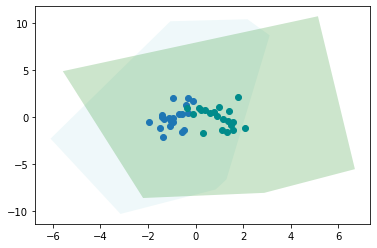

In [11]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

#points = np.random.rand(30, 2)   # 30 random points in 2-D
#hull = ConvexHull(points)

plt.plot(points0[:,0], points0[:,1], 'o')
cent = np.mean(points0, 0)
pts = []
for pt in points0[hull.simplices]:
    print(pt)
    pts.append(pt[0].tolist())
    pts.append(pt[1].tolist())
 
pts.sort(key=lambda p: np.arctan2(p[1] - cent[1],
                                p[0] - cent[0]))
pts = pts[0::2]  # Deleting duplicates
pts.insert(len(pts), pts[0])

k = 5 # the scaling factor, change iteratively until areas overlap
color = 'powderblue'
poly = Polygon(k*(np.array(pts) - cent) + cent,
               facecolor=color, alpha=0.2)
poly.set_capstyle('round')
plt.gca().add_patch(poly)

#Make it dynamic in loop for each hull in data for project input
# Hull 2  Begins 
plt.plot(points1[:,0], points1[:,1], 'o', color = 'darkcyan')

cent1 = np.mean(points1, 0)
pts1 = []
for pt in points1[hull1.simplices]:
    pts1.append(pt[0].tolist())
    pts1.append(pt[1].tolist())

pts1.sort(key=lambda p: np.arctan2(p[1] - cent1[1],
                                p[0] - cent1[0]))
pts1 = pts1[0::2]  # Deleting duplicates
pts1.insert(len(pts1), pts1[0])
#k = 1.1
color = 'green'

poly1 = Polygon(k*(np.array(pts1) - cent1) + cent1,
               facecolor=color, alpha=0.2)
poly1.set_capstyle('round')
plt.gca().add_patch(poly1)
#plt.savefig('convex.png')

7.036358091238974


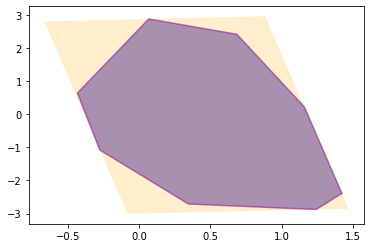

CLass 0:

CLass 1:

[array([ 1.21290648, -0.71869421]), array([ 0.60647149, -1.12772433]), array([ 1.21197796, -0.58861397]), array([ 1.00972903, -1.45496704]), array([ 0.56216029, -1.37186247]), array([0.72973515, 0.35988092]), array([0.39284694, 1.00862714]), array([0.17336897, 0.30279016]), array([0.6168276 , 2.28438069]), array([ 0.91094238, -0.35502465]), array([ 0.75389832, -0.9418674 ]), array([ 0.60651985, -1.14724826]), array([ 0.54111179, -0.7799858 ]), array([0.91559423, 1.06303296]), array([ 0.25201646, -0.55712765])]
hello
[array([ 0.37669071, -1.63772617]), array([-0.02095101,  1.05833253]), array([-0.29050649, -0.04721317]), array([-0.25815146,  0.43614121]), array([ 0.21608231, -0.04046664]), array([-0.25452413,  0.81613417])]


In [100]:
from shapely.geometry  import Point, Polygon,box

p = Polygon(poly.get_xy())
q = Polygon(poly1.get_xy())
#print(p.intersects(q))  # True
overlap_within_c0 = []
overlap_within_c1 = []
if(p.intersects(q)):
    print(p.intersection(q).area)  # 1.0
    x = p.intersection(q)
    x,y = x.exterior.xy
    fig, axs = plt.subplots()   
    #plt.show()     
    #print (x)
    #print (y)
    #plt.plot(x,y)
    x_list=x.tolist()
    y_list=y.tolist()
    a = np.array(x_list)
    b = np.array(y_list)
    arr_2d = np.concatenate([a[:,None],b[:,None]], axis=1)
    #print (arr_2d)
    overlaparea = Polygon(arr_2d)
    plt.plot(*overlaparea.exterior.xy,c='darkmagenta', alpha=0.5)
    axs.fill(*overlaparea.exterior.xy, alpha=0.7, fc='slateblue', ec='none')
    box = overlaparea.minimum_rotated_rectangle
    x, y = box.exterior.coords.xy
    axs.fill(*box.exterior.coords.xy, alpha=0.2, fc='orange', ec='none')
    plt.show() 
    print("CLass 0:\n")
    for point in points0:
        Ptin=Point(point[0],point[1])    
        #print(overlaparea.contains(Ptin) , Ptin.within(overlaparea) )
        if(Ptin.within(overlaparea)):
           # print("found 1:",point )
            overlap_within_c0.append(point )
    print("CLass 1:\n")
    for point in points1:
        Ptin1=Point(point[0],point[1])    
        if(Ptin1.within(overlaparea)):
           # print("found 1:",point )
            overlap_within_c1.append(point)
else:
    print("No intersection")
    

print(overlap_within_c0)
print("hello")
print(overlap_within_c1)

#

# get coordinates of polygon vertices


(5.838953510632355, 1.55685103556604) 1.55685103556604 5.838953510632355


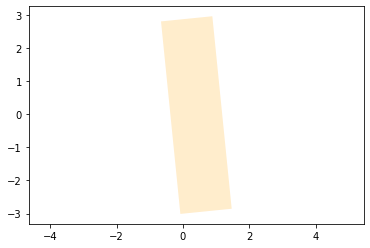

In [101]:
fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')

x, y = box.exterior.coords.xy
axs.fill(*box.exterior.coords.xy, alpha=0.2, fc='orange', ec='none')

# get length of bounding box edges
edge_length = (Point(x[0], y[0]).distance(Point(x[1], y[1])), Point(x[1], y[1]).distance(Point(x[2], y[2])))

# get length of polygon as the longest edge of the bounding box
length = max(edge_length)

# get width of polygon as the shortest edge of the bounding box
width = min(edge_length)

print(edge_length ,width ,length )

1.4222862662477938 -2.3917834642021956
1.2412348412674379 -2.876954379024521
0.3460973628530679 -2.7107452305081488
-0.274190291576935 -1.0812756000372277
-0.4314852690215658 0.6385600120470062
0.06867913235806675 2.873539759827958
0.6861218852533866 2.4123915626605
1.1601885247083998 0.21479322326149758
1.4222862662477938 -2.3917834642021956


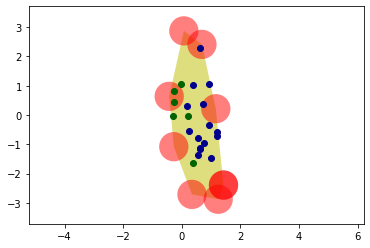

In [102]:
circ_list =[]
for x in arr_2d:
    print (x[0],x[1])
    circ_list.append(Point(x[0],x[1]).buffer(0.5))
    #circ = shapely.geometry.Point(x[0],x[1]).buffer(1)
    #(*circ.exterior.xy, alpha=0.5, fc='y', ec='none')
    #plt.show()
    
fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')
axs.fill(*overlaparea.exterior.xy, alpha=0.5, fc='y', ec='none')

for p in overlap_within_c0:
    axs.plot(p[0], p[1], 'o',c='darkblue')
    
for p in overlap_within_c1:
    axs.plot(p[0], p[1], 'o',c='darkgreen')


for c in circ_list:    
    xs, ys = c.exterior.xy    
    axs.fill(xs, ys, alpha=0.5, fc='r', ec='none')

plt.show()
    

In [103]:
import numpy as np
import smallestenclosingcircle as smc
import matplotlib.pyplot as plt

In [104]:
def real_points(X):
    labels = range(1, len(X)+1)
    plt.figure(figsize=(10, 7))
    plt.subplots_adjust(bottom=0.1)
    plt.scatter(X[:,0],X[:,1], label='True Position')
    for label, x, y in zip(labels, X[:, 0], X[:, 1]):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-3, 3),
            textcoords='offset points', ha='right', va='bottom')
    plt.show()

In [108]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
def getDend(X,threshold):
    linked = linkage(X, 'ward')
    labelList = range(1, len(X)+1)
    plt.figure(figsize=(10, 7))
    dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
    plt.show()
    clusters = fcluster(linked,threshold, 'maxclust')
    return  clusters


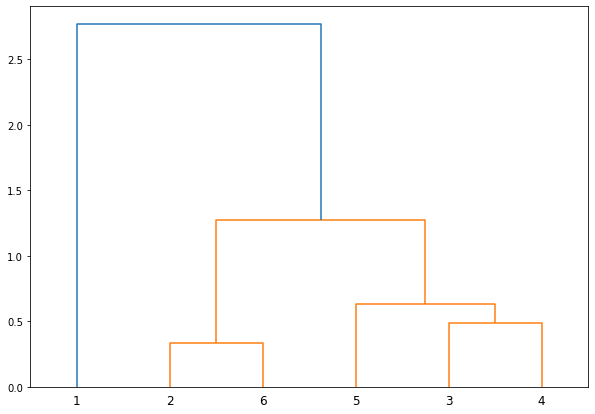

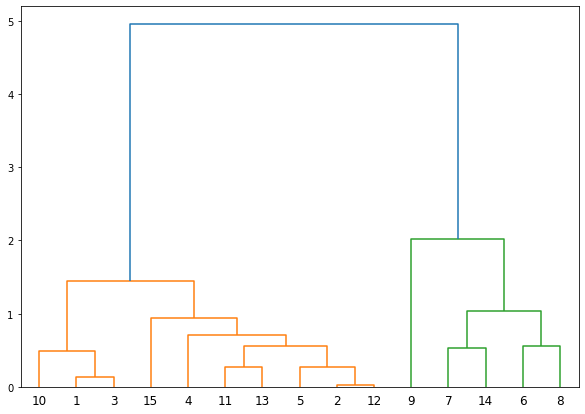

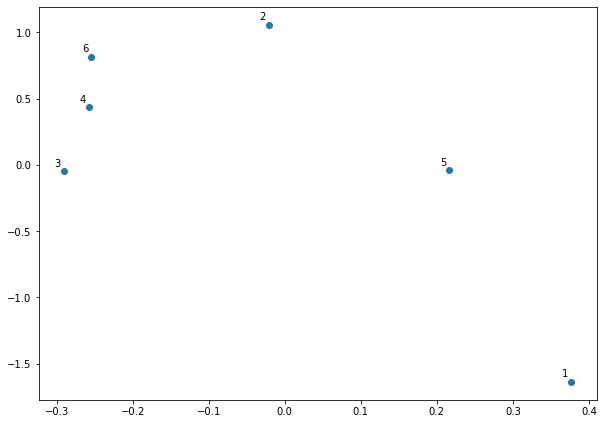

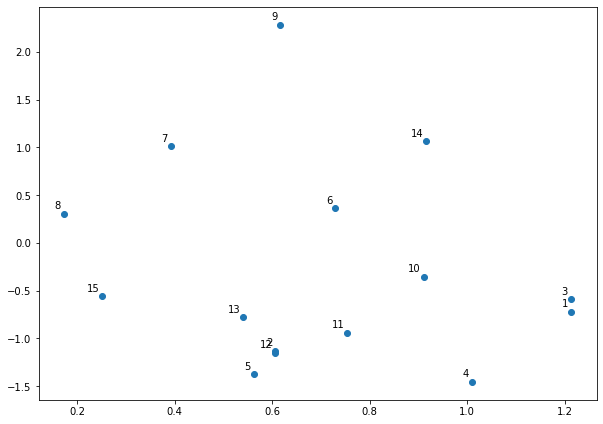

In [109]:
c1=getDend(np.array(overlap_within_c1),4); #0.4
c0=getDend(np.array(overlap_within_c0),4); #0.4
real_points(np.array(overlap_within_c1))
real_points(np.array(overlap_within_c0))
box = overlaparea.minimum_rotated_rectangle
x, y = box.exterior.coords.xy

In [110]:
def getCircles(clusters, X):
    i=0
    labels = range(1, len(X)+1)
    data=[]
    for label, x, y in zip(labels, X[:, 0], X[:, 1]):
        #print(label, x, y, clusters[i]) 
        data.append([label, x, y, clusters[i]])
        i=i+1
    
    circ_list_local =[]
    x= np.array(data)
    #print(x)
    cl= np.unique( x[:,3])
   # print(len(cl))
    depth = [[] for _ in range(len(cl) )]
    #print(depth)
    for c in cl:
        for d in x:
            if(d[3] == c):
                depth[int(c-1)].append(d.tolist()) 

            
    point_list = [[] for _ in range(len(cl) )]
    for d in depth:
        for p in d:
            tup =(p[1],p[2])
            point_list[int(p[3] - 1) ].append(tup)

    min_x = 10000
    min_y =10000
    max_x=0
    max_y = 0
    index = 0
    circle= [[] for _ in range(len(cl) )]
    

    for point in  point_list:
        circ = smc.make_circle(point)
        circle[index] = circ
        index=index+1
        test_x =  circ[0]+ circ[2]
        test_y =  circ[1] + circ[2]
        if(min_x > test_x ):
            min_x= test_x
        if(min_y > test_y ):
            min_y= test_y
        if(max_x <  test_x ):
            max_x= test_x
        if(max_y <  test_y ):
            max_y= test_y
    
    return circle,min_x,min_y,max_x,max_y

    

In [111]:
def plot_circles(circle,min_x,min_y,max_x,max_y,X):   
    col_ind=0
    color = ['y','r','g','b']
    fig, ax = plt.subplots(figsize=(10,10))
    plt.xlim(min_x-0.5,max_x+0.5, 0.25)
    plt.ylim(min_y-0.5,max_y+0.5, 0.15)
    ax.set_aspect(1)
    plt.grid(linestyle='--')
    for c in  circle:
        if(c[2]!=0):
         c1=plt.Circle((c[0],c[1]),c[2], color=color[col_ind], alpha=0.35) 
         ax.add_artist(c1)
         col_ind=col_ind+1
        else:
            c1=plt.Circle((c[0],c[1]),0.07, color='black', alpha=0.35) 
            ax.add_artist(c1)
    labels = range(1, len(X)+1)        
    plt.scatter(X[:,0],X[:,1], label='True Position')
    #print(labels)
    for label, x, y in zip(labels, X[:, 0], X[:, 1]):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-3, 3),
            textcoords='offset points', ha='right', va='bottom')
    #plt.show()


In [112]:
def plot_circles_comb(circle,min_x,min_y,max_x,max_y, PX):   
    col_ind=0
    color = ['y','r','g','b','m','teal']
    fig, ax = plt.subplots(figsize=(10,10))
    plt.xlim(min_x-0.5,max_x+0.5, 0.25)
    plt.ylim(min_y-0.5,max_y+0.5, 0.15)
    ax.set_aspect(1)
    ax.set_facecolor('whitesmoke')
    plt.grid(linestyle='--')
    for c in  circle:
        if(col_ind==7):
            col_ind=0
        if(c[2]!=0):
         c1=plt.Circle((c[0],c[1]),c[2], color=color[col_ind], alpha=0.3)  
         ax.add_artist(c1)
         col_ind=col_ind+1
        else:
            c1=plt.Circle((c[0],c[1]),0.07, color='black', alpha=0.3) 
            ax.add_artist(c1)
            
    for X in PX:
        labels = range(1, len(X)+1)        
        plt.scatter(X[:,0],X[:,1], label='True Position', s=50)
        #print(labels)
        for label, x, y in zip(labels, X[:, 0], X[:, 1]):
            plt.annotate(
            label,
            xy=(x, y), xytext=(-3, 3),
            textcoords='offset points', ha='right', va='bottom')    
   

In [113]:
circle1, m1,m2,m3,m4 = getCircles(c1,np.array(overlap_within_c1))

In [114]:
circle0, m10,m20,m30,m40 = getCircles(c0,np.array(overlap_within_c0))

In [115]:
min_x= min(m1,m10);
min_y=min(m2,m20);
max_x = max(m3,m30);
max_y = max(m4,m40);

circles = [circle0, circle1]
class_ind =0
for c in circles: 
    count =0
    for x in c:
        #print(type(c))
        circles[class_ind][count] = (x[0],x[1],x[2],class_ind)
        count=count+1
    class_ind=class_ind+1


circle_main = np.concatenate((circles[0], circles[1]), axis=0)
#print(circle_main)

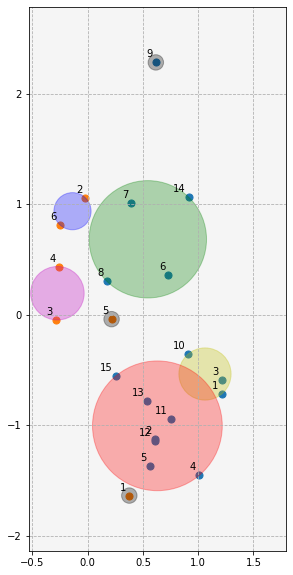

In [127]:
point_ann = [ np.array(overlap_within_c0) , np.array(overlap_within_c1)  ] 
#print(circle1)
plot_circles_comb(circle_main,min_x,min_y,max_x,max_y, point_ann)
#plot_circles(circle0,m10,m20,m30,m40,np.array(overlap_within_c0) )
#plot_circles(circle1,m1,m2,m3,m4, np.array(overlap_within_c1) )
#print(circle0)



Main Algo Logic

313.6548490545939
0.0156827432872473


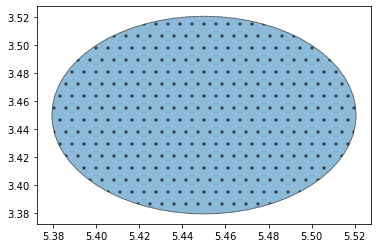

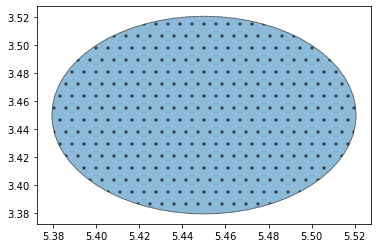

In [117]:
from descartes.patch import PolygonPatch
patch = Point(0.0, 0.0).buffer(10.0)
print(patch.area)
patch1 = Point(5.45, 3.45 ).buffer(0.07071068)
print(patch1.area)
#list(patch.exterior.coords)
intersection = patch.intersection(patch1)
#print(intersection)
intersection_patch = PolygonPatch(intersection, alpha=0.5, hatch='.')
fig, ax = plt.subplots()
ax.add_patch(intersection_patch )
plt.autoscale()

intersection_patch1 = PolygonPatch(patch1, alpha=0.5, hatch='.')
fig, ax = plt.subplots()
ax.add_patch(intersection_patch1 )
plt.autoscale()

In [118]:
circle_main

array([[ 1.06192443, -0.53685943,  0.23634607,  0.        ],
       [ 0.63087275, -1.00604735,  0.58741891,  0.        ],
       [ 0.5444816 ,  0.68291156,  0.53124087,  0.        ],
       [ 0.6168276 ,  2.28438069,  0.        ,  0.        ],
       [-0.13773757,  0.93723335,  0.16823826,  1.        ],
       [-0.27432898,  0.19446402,  0.24221804,  1.        ],
       [ 0.21608231, -0.04046664,  0.        ,  1.        ],
       [ 0.37669071, -1.63772617,  0.        ,  1.        ]])

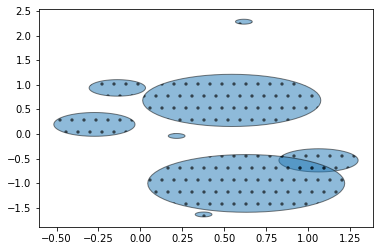

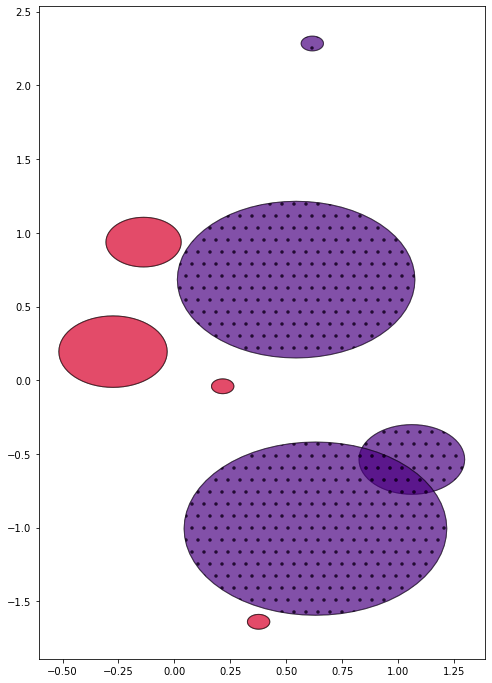

In [170]:
def single_point_radius(x):
    if( x== 0.0 ):
           return 0.05
        #print("ji",c[2] ,radius)
    else:
            return x

def plot_class_circles(circle_main):
    fig, ax = plt.subplots()
    for c in circle_main:
    #print(c[0], c[1],round(c[2],10))
        radius= single_point_radius(c[2])
        patch = Point(c[0], c[1]).buffer(radius)
        #print(patch.area)
        patch_pol = PolygonPatch(patch, alpha=0.5, hatch='.')
        ax.add_patch(patch_pol)
        plt.autoscale()  
        
#

    
    
def chk_intersection(cl_0,cl_1):
    fig, ax = plt.subplots(figsize=(8, 12))
    i=0
    j =0
    for c in cl_0:
        for cl in cl_1:
            #print(cl)
            radius= single_point_radius(cl[2])
            radius1= single_point_radius(c[2])
            p0 = Point(c[0], c[1]).buffer(radius1)
            p1 = Point(cl[0], cl[1]).buffer(radius) 
            patch0= PolygonPatch(p0, alpha=0.25, hatch='.', fc='indigo')
            patch1= PolygonPatch(p1, alpha=0.3, hatch='0', fc='crimson')
            ax.add_patch(patch0)
            ax.add_patch(patch1)
            plt.autoscale()
           # p = Polygon(p0.get_xy())
            #q = Polygon(p1.get_xy())
            #print(p0.intersects(p1))  # True
            if(p0.intersects(p1)):
                 print("ok")
                 j=+1
               
                
            else:
                #print("SCALING")
                r = single_point_radius(cl[2])
                p0 = Point(c[0], c[1]).buffer(r*2)
                cl_0[i]
                p1 = Point(cl[0], cl[1]).buffer(r*2) 
               
        i=+1      
                
  

                
           
    
#print(type(circles[0]))
#chk_intersection(np.array(overlap_within_c0),np.array(overlap_within_c1))
plot_class_circles(circle_main)
chk_intersection(circles[0],circles[1])  

--
[[1, 10, 9, 0, 3, 4], [6, 1, 4], [8, 0, 3, 2, 7], [8, 0, 11, 12], [13, 7, 8, 14], [15, 5, 2, 7, 16], [6, 4, 3, 2, 5], [18, 17, 1, 6, 5]]
--


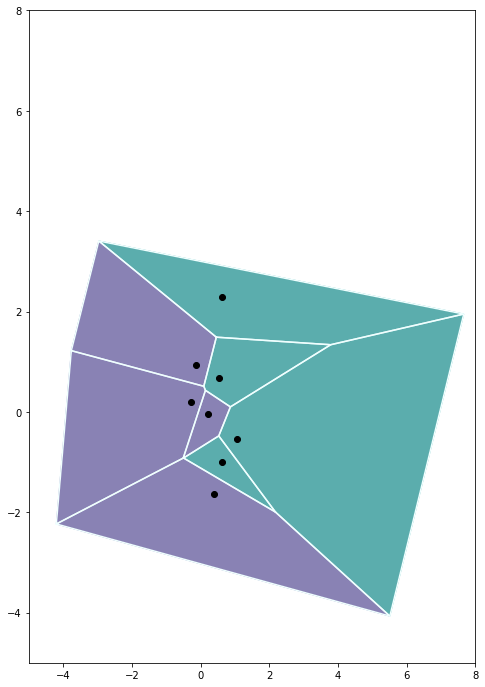

[<shapely.geometry.polygon.Polygon object at 0x00000176F64AF700>, <shapely.geometry.polygon.Polygon object at 0x00000176F64AFB50>, <shapely.geometry.polygon.Polygon object at 0x00000176F68E9670>, <shapely.geometry.polygon.Polygon object at 0x00000176F6481910>]
[<shapely.geometry.polygon.Polygon object at 0x00000176F65E6130>, <shapely.geometry.polygon.Polygon object at 0x00000176F66CCA30>, <shapely.geometry.polygon.Polygon object at 0x00000176F64A9220>, <shapely.geometry.polygon.Polygon object at 0x00000176F64A94C0>]


In [233]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import shapely.geometry
import shapely.ops
from scipy.spatial import Voronoi

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

# make up data points
np.random.seed(1234)
points = np.random.rand(15, 2)
points = np.array([[c[0], c[1]] for c in circle_main]) 
classes = np.array([[c[3]] for c in circle_main]) 
#print(classes)
speed = np.random.uniform(low=0.0, high=5.0, size=50)
vor = Voronoi(points)



minima = min(speed)
maxima = max(speed)
import matplotlib as mpl
import matplotlib.cm as cm
from shapely import geometry

norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues_r)

# compute Voronoi tesselation
#vor = Voronoi(points)
fig, ax = plt.subplots(figsize=(8, 12))
# plot
regions, vertices = voronoi_finite_polygons_2d(vor)
print ("--")
print (regions)
print ("--")
#print (vertices)

# colorize


polygons0 =[]
polygons1 =[]

col_index=0
for region in regions:
    polygon = vertices[region]
  
    #print("halllo", polygon)
    poly = geometry.Polygon([[p[0], p[1]] for p in polygon])
    #print(poly.wkt) 
    x,y = poly.exterior.xy
    plt.plot(x,y,color= 'azure')
    
    #polygons0.append(*zip(*polygon))
    if classes[col_index] == 1:
        polygons1.append(poly)
        col= 'darkslateblue'
    else:
        polygons0.append(poly)
        col='teal'
    plt.fill(*zip(*polygon), alpha=0.4, color=col ) #
    plt.fill( *poly.exterior.xy, alpha=0.4, color=col )
    col_index=col_index+1
plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
plt.xlim([-5,8])
plt.ylim([-5, 8])
plt.show()




In [346]:
from shapely.geometry import Point, LineString
def getPolyBounds(line, mag):
   upper =  line.coords[0]
   lower =  line.coords[1]
   upper_x= upper[0] 
   lower_x = lower[0]
    
   upper_right =  upper_x + 10
   upper_left  = upper_x - 10
   lower_right = lower_x + 10
   lower_left = lower_x - 10
   
   polygon = Polygon([(upper_right,upper[1] ),(upper_left,upper[1]),(lower_left,lower[1] ),(lower_right,lower[1] )])
   return  polygon



def getClass(point, model,lines):
    print("kkkkkkkkkk")
    pnt = Point(point[0],point[1])
    lin_ind=0
    for p in model: 
        print(pnt.within(p))
        its_line = lines[lin_ind]
        print(its_line)
        #getDirection(point, its_line)

        
def getDirection(point, line):
    point_x_minus =  point[0] - 100
    point_x_plus = point[0] + 100
    point_y_minus =  point[1] - 100
    point_y_plus = point[1] + 100
    point1 = (point_x_minus,point[1])
    point2=( point_x_plus,point[1])
    point3 = (point_y_minus,point[1])
    point4 = (point_y_plus,point[1])
    print(point1 ,point2)
    print(point3 ,point4)
    test_line_horizontal = LineString([point1, point2])
    test_line_vertical = LineString([point3, point4])
    print( "######  Line Intersection #######")
    print(test_line_horizontal.intersection(line))
    #print(test_line_vertical.intersection(line))
    print( "######  Line Intersection #######")
    
        
    

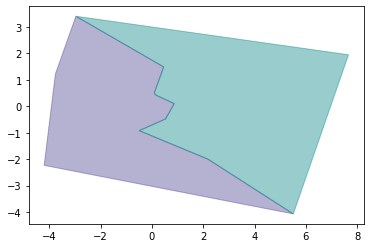

orange
True
limegreen
True
grey
False
plum
True
gold
True
darkcyan
True
navy
False
indigo
False
[<shapely.geometry.polygon.Polygon object at 0x00000176F6E75100>, <shapely.geometry.polygon.Polygon object at 0x00000176F85014F0>, <shapely.geometry.polygon.Polygon object at 0x00000176F6CE72B0>, <shapely.geometry.polygon.Polygon object at 0x00000176F6CE7BB0>, <shapely.geometry.polygon.Polygon object at 0x00000176F813C820>, <shapely.geometry.polygon.Polygon object at 0x00000176F813C550>, <shapely.geometry.polygon.Polygon object at 0x00000176F813CD60>, <shapely.geometry.polygon.Polygon object at 0x00000176F7FCDFA0>]
[[...], [...], [...], [...], [...], [...], [...], [...]]
kkkkkkkkkk
False
[[...], [...], [...], [...], [...], [...], [...], [...]]
False
[[...], [...], [...], [...], [...], [...], [...], [...]]
False
[[...], [...], [...], [...], [...], [...], [...], [...]]
False
[[...], [...], [...], [...], [...], [...], [...], [...]]
True
[[...], [...], [...], [...], [...], [...], [...], [...]]
F

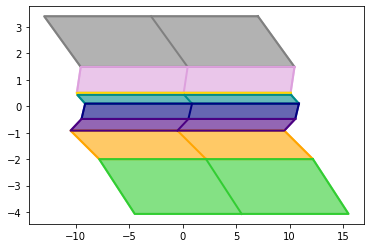

In [347]:
#print(polygons1)
#print(polygons0)
from shapely.ops import cascaded_union

#import geopandas as gpd
#boundary1 = gpd.GeoSeries(cascaded_union(polygons1))
#boundary0 = gpd.GeoSeries(cascaded_union(polygons0))
#boundary1.plot(color = 'red')
#


new_pol = cascaded_union(polygons1) 
new_ring1 = Polygon(new_pol.exterior.coords)
plt.fill( *new_ring1.exterior.xy, alpha=0.4, color=col )

new_pol = cascaded_union(polygons0) 
new_ring0 = Polygon(new_pol.exterior.coords)
plt.fill( *new_ring0.exterior.xy, alpha=0.4, color='teal' )

plt.show()

new_ring1.intersects(new_ring0)

inter = new_ring1.intersection(new_ring0)
#print(inter)
def isLeft(a,  b, c):
     return ((b[0] - a[0])*(c[1] - a[1]) - (b[1] - a[1])*(c[0] - a[0])) > 0;

point = [0.5,0.5]
polylist =[]
lines = []
colors= ['orange', 'limegreen', 'grey','plum', 'gold', 'darkcyan', 'navy','indigo',  ]
col_ind = 0
model_dict = {}
for line in inter:
     #print (line.coords[0],"wow",line.coords[1])
     poly = getPolyBounds(line, 20)
     polylist.append(poly)
     lines.append(lines)
     plt.plot(*line.coords.xy, linewidth=2.0, color = colors[col_ind])
     plt.plot(*poly.exterior.xy, linewidth=2.0, color = colors[col_ind])
     plt.fill(*poly.exterior.xy, linewidth=2.0, color = colors[col_ind], alpha= 0.6)
     print(colors[col_ind])
     col_ind += 1
     print(isLeft(line.coords[0],line.coords[1], point))

print(polylist) 
print(lines)
getClass([0.5,0.5], polylist, lines)



    
#poly_dict = {id: 1, poly:, line: }
#plt.plot(0.5,0.5, 'o', color = 'navy')
#plt.show()
#plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

#PLot and store region for each line segment 
#store the polygon and line equation in a dictionary
# see if point lies within which polygon
#when true, take the point and the line equation
#extend a line out of the point on bothall four sides  
#check intersection of the line of region and line of point 
#if the itersection point lies towards the right side of the 
#test point =  point is on left of line assign  label for that side
#if intersection point is on right of the test point then 
#the test point is on the left of the line
#check and assign class





    






In [ ]:
   
                 #plot_class_circles()
                 #print(p0.intersects(p1)) 
                 if(p0.intersects(p1)):
                     print("ok")
                     x= p0.intersection(p1)      
                     #pat1= PolygonPatch(x, alpha=0.5, hatch='0', fc='red')
                     plt.plot(*x.exterior.xy,c='indigo', alpha=1)
                     axs.fill(*x.exterior.xy, alpha=1, fc='indigo', ec='none')
                     #ax.add_patch(pat1)
                     plt.autoscale()
    
    
    
    
    x,y = x.exterior.xy
                     x_list=x.tolist()
                     y_list=y.tolist()
                     a = np.array(x_list)
                     b = np.array(y_list)
                     arr_2d = np.concatenate([a[:,None],b[:,None]], axis=1)
                    #print (arr_2d)
                     overlaparea = Polygon(arr_2d)

In [ ]:
 
                print(p.intersection(q).area)  # 1.0
                x = p.intersection(q)
                x,y = x.exterior.xy
                intersection = p0.intersection(p1)
         
            else:
                intersection_patch = PolygonPatch(intersection, alpha=0.5, hatch='.')
                ax.add_patch(intersection_patch)
                plt.autoscale()
        
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)

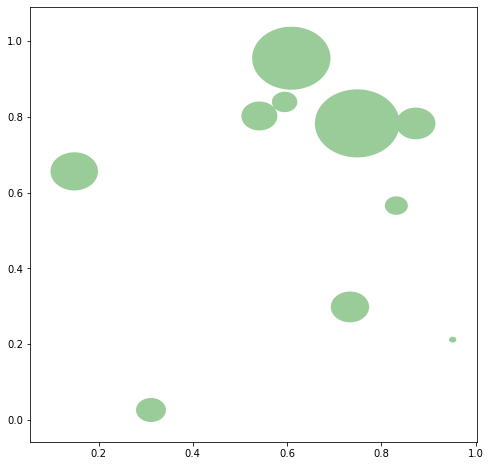

In [128]:
import random
from shapely.ops import *
import pylab as pl
from matplotlib.patches import Polygon

circles = [Point(random.random(), random.random()).buffer(random.random() * 0.1) 
            for i in range(10)]
#print(circles)
polygons = cascaded_union(circles)
fig, ax = pl.subplots(figsize=(8, 8))

for polygon in polygons:
    mpl_poly = Polygon(np.array(polygon.exterior), fc="g", lw=0, alpha=0.4)
    ax.add_patch(mpl_poly)

ax.relim()
ax.autoscale()

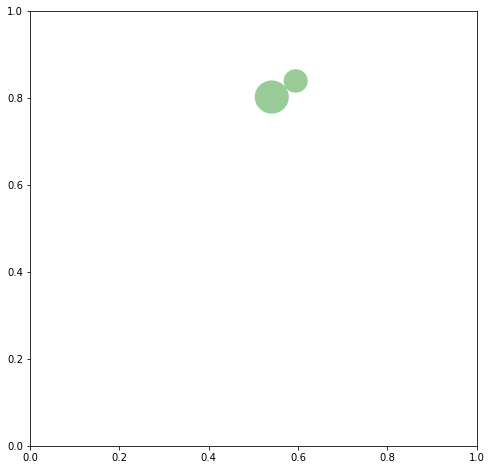

In [131]:
 from rtree import index
 idx = index.Index()
 # create the spatial index
 for pos, cell in enumerate(circles):
    idx.insert(pos, cell.bounds)
 # loop through each polygon
#print ([circles[pos] for pos in idx.intersection(poly.bounds)])
fig, ax = pl.subplots(figsize=(8, 8))
 for poly in circles:
    # Merge cells that have overlapping bounding boxes
    merged_cells = cascaded_union([circles[pos] for pos in idx.intersection(poly.bounds)])
    # Do actual intersection
    #poly.intersection(merged_cells)
    #mpl_poly2 = Polygon(np.array((poly.intersection(merged_cells)).exterior), fc="b", lw=0, alpha=0.4)
    #ax.add_patch(mpl_poly2)
    
mpl_poly = Polygon(np.array( merged_cells.exterior), fc="g", lw=0, alpha=0.4)
ax.add_patch(mpl_poly)


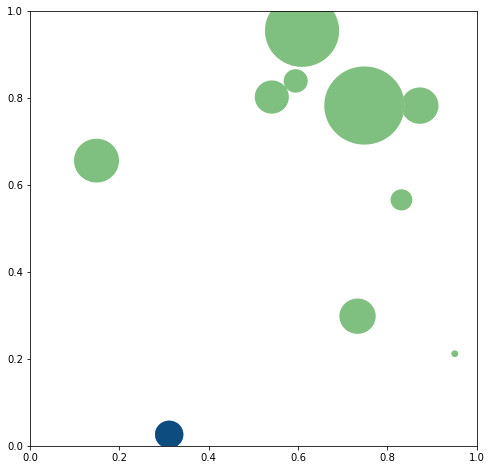

In [146]:
from shapely.geometry import LineString
fig, ax = pl.subplots(figsize=(8, 8))
rings = [LineString(pol.exterior.coords) for pol in circles]
mpl_poly = Polygon(np.array(rings[1]), fc="b", lw=10, alpha=0.9)
ax.add_patch(mpl_poly)
union = cascaded_union(rings)
result = [geom for geom in polygonize(union)]
for r in result:
    mpl_poly = Polygon(np.array(r.exterior), fc="g", lw=0, alpha=0.5)
    ax.add_patch(mpl_poly)

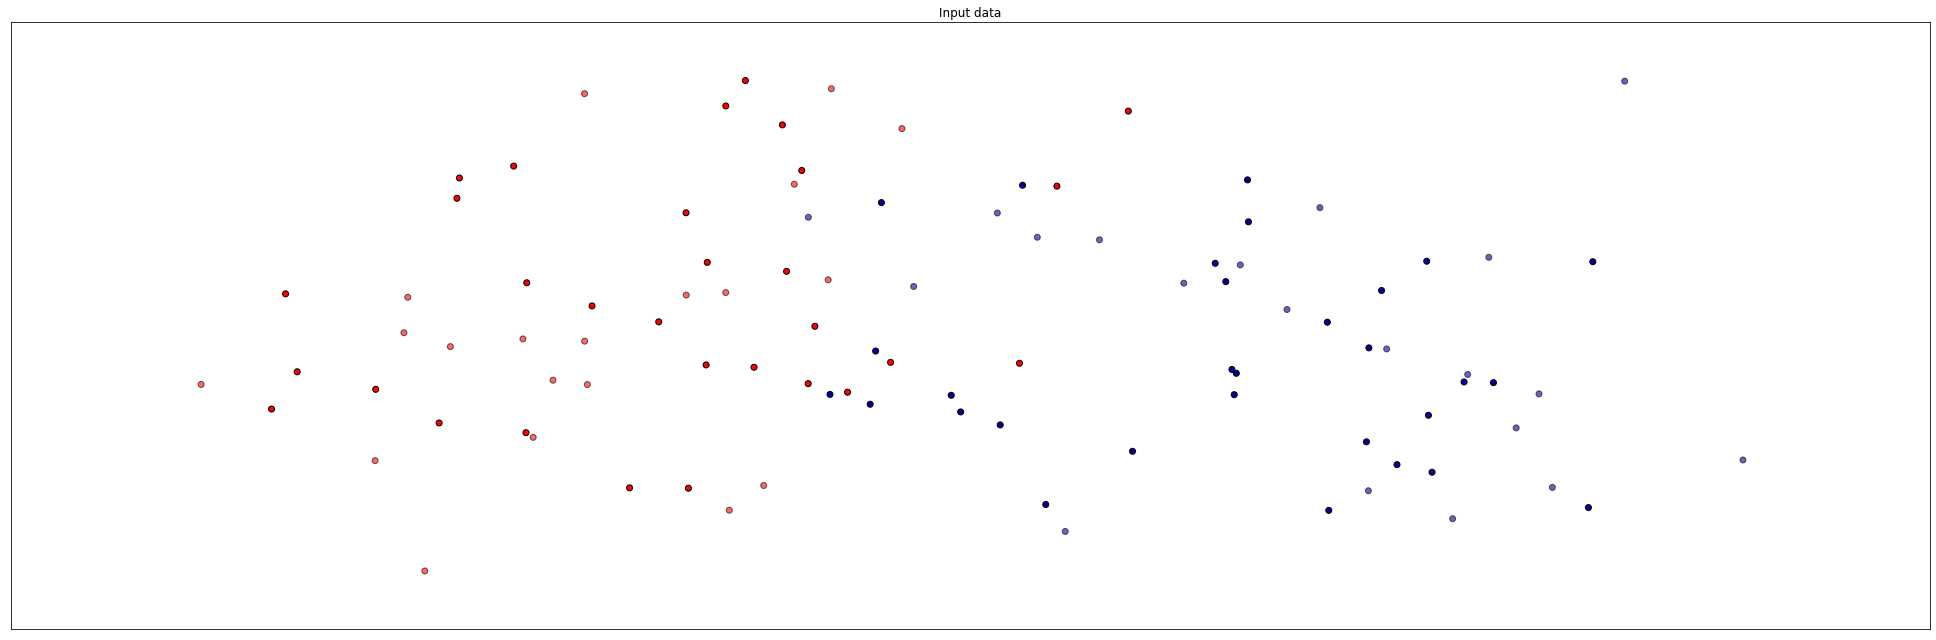

In [3]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
import numpy as np
import matplotlib.pyplot as plt

h = .02  # step size in the mesh
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=2)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
#print(linearly_separable)
datasets = [linearly_separable]



figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    #print(X)
    #print(y)
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#00009F'])
    ax = plt.subplot(len(datasets),1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
plt.tight_layout()
plt.show()

#print(X_test)
    
   